<a href="https://colab.research.google.com/github/xie186/Coursera_StatisticsWithPython/blob/master/StatisticsWithPython_CourseraCourse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Understanding and Visualizing Data with Python

## UNIVARIATE DATA

### Quantitative data: Histograms

#### Quantititave data


* What are quantitiative variables


Variables that have a numerical value (quantity) thant we can perform mathematical operations on. 

__Examples__: 

* Continuous values: Height, weight, income, test scores, shoes size, 

* Discrete: number of "heads" after 10 coin flips

![](https://user-images.githubusercontent.com/20909751/56850116-e91aac80-68cb-11e9-9ea0-ea1612b9f5fd.png)

### Four main aspects of Histogram

* __Shape__: Overall appearance of historgram

* __Center__: Mean or Median

* __Spead__: How far our data speads. Range, Interquartile Range (IQR), standard deviation, variance.


* __Ourliers__: Data points that fall far from the bulk of the data


## MULTIVARIATE DATA

In the third week of this course on looking at data, we’ll introduce key ideas for examining research questions that require looking at more than one variable. In particular, we will consider both numerically and visually how different variables interact, how summaries can appear deceiving if you don’t properly account for interactions, and differences between quantitative and categorical variables. This week’s assignment will consist of a writing assignment along with reviewing those of your peers.



*italicized text ![alt text](https://)*### Simpons paradox

Simpson's paradox  is a phenomenon in probability and statistics, in which a trend appears in several different groups of data but disappears or reverses when these groups are combined.

*italicized text*#### Example: UC Berkeley gender bias

One of the best-known examples of Simpson's paradox is a study of gender bias among graduate school admissions to University of California, Berkeley. The admission figures for the fall of 1973 showed that men applying were more likely than women to be admitted, and the difference was so large that it was unlikely to be due to chance.


In [0]:
import pandas as pd
file = 'https://raw.githubusercontent.com/xie186/Coursera_StatisticsWithPython/master/data/UCBGradAdmData1973.csv'
df = pd.DataFrame(pd.read_csv(file))
df

,Admit,Gender,Dept,Freq
0,Admitted,Male,A,512
1,Rejected,Male,A,313
2,Admitted,Female,A,89
3,Rejected,Female,A,19
4,Admitted,Male,B,353
5,Rejected,Male,B,207
6,Admitted,Female,B,17
7,Rejected,Female,B,8
8,Admitted,Male,C,120
9,Rejected,Male,C,205


##### Gender bias 

The admission figures for the fall of 1973 showed that men applying were more likely than women to be admitted, and the difference was so large that it was unlikely to be due to chance.

In [0]:
import numpy as np
df_sum = pd.pivot_table(df, values="Freq", index=["Gender"], 
                          columns=["Admit"], aggfunc=np.sum)

df_sum["%"] = 100*df_sum["Admitted"] / (df_sum["Admitted"] + df_sum["Rejected"])
df_sum

Admit,Admitted,Rejected,%
Gender,,,
Female,557,1278,30.354223
Male,1198,1493,44.518766


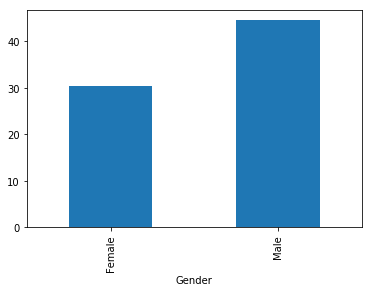

In [0]:
df_sum["%"].plot(kind="bar", y="%")

##### Department level summary

When examining the individual departments, it appeared that six out of 85 departments were significantly biased against men, whereas only four were significantly biased against women. In fact, the pooled and corrected data showed a "small but statistically significant bias in favor of women".[15] The data from the six largest departments are listed below, the top two departments by number of applicants for each gender italicised.

In [0]:
df_pivot = df.pivot_table(values="Freq", index=["Dept"], 
                          columns=["Gender", "Admit"])

df_pivot["%(Female)"] = 100*df_pivot["Female"]["Admitted"]/(df_pivot["Female"]["Rejected"] + df_pivot["Female"]["Admitted"])
df_pivot["%(Male)"] = 100*df_pivot["Male"]["Admitted"]/(df_pivot["Male"]["Rejected"] + df_pivot["Male"]["Admitted"])
df_pivot


Gender   Female              Male           %(Female)    %(Male)
Admit  Admitted Rejected Admitted Rejected                      
Dept                                                            
A            89       19      512      313  82.407407  62.060606
B            17        8      353      207  68.000000  63.035714
C           202      391      120      205  34.064081  36.923077
D           131      244      138      279  34.933333  33.093525
E            94      299       53      138  23.918575  27.748691
F            24      317       22      351   7.038123   5.898123

MultiIndex(levels=[['Female', 'Male', '%(Female)', '%(Male)'], ['Admitted', 'Rejected', '']],
           codes=[[2, 3], [2, 2]],
           names=['Gender', 'Admit'])
Index(['%(Female)', '%(Male)'], dtype='object')


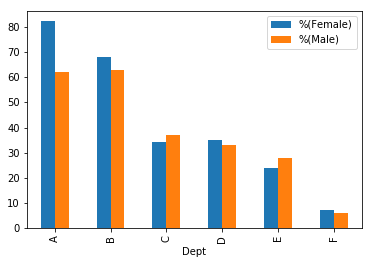

In [0]:
df_perc = df_pivot[["%(Female)",	"%(Male)"]]
print(df_perc.columns)
df_perc.columns = ['%(Female)', '%(Male)']
print(df_perc.columns)
df_perc
df_perc.plot(kind="bar")

The research paper by Bickel et al. concluded that __women tended to apply to competitive departments with low rates of admission even among qualified applicants__ (such as in the English Department), whereas __men__ tended to apply to __less-competitive departments__ with high rates of admission among the qualified applicants (such as in engineering and chemistry).

In [0]:
import numpy as np
df = pd.DataFrame([[1, 2, 3],
                    [4, 5, 6],
                   [7, 8, 9],
                    [np.nan, np.nan, np.nan]],
                   columns=['A', 'B', 'C'])
print(df)
df.agg(['sum', 'min'])


     A    B    C
0  1.0  2.0  3.0
1  4.0  5.0  6.0
2  7.0  8.0  9.0
3  NaN  NaN  NaN


,A,B,C
sum,12.0,15.0,18.0
min,1.0,2.0,3.0


### Modern ways to visulize data

While viewing them, think through:

What about this visualization made it easy or hard to understand the data?
Why do you think this visualization was used instead of other visualizations we discussed in the course?
Could this visualization be used for other kinds of data?
Want to see how selfies are taken across the world? Check out this website to see different categories of selfies in 5 different cities.

Want to see how economic inequality has changed over time? Look at this article to see how a series of data visualizations are used to tell a story about the global economy.

Check out this visualization of shot attempts of the Washington Wizards, an NBA team.

Want to see how music popularity has changed over time? Check out this cool visualization. You can click different genres for a further breakdown.

Want to know what ages certain people get married? Check out this interactive visualization that allows you to understand the marriage age of different groups of people.

Want to know how different cities rank in terms of social, environmental and financial well being? Check out the visualization here to see how different cities compare.

How many times did the song “Total Eclipse of the Heart” get streamed during the 2017 solar eclipse? Check out the visualization here, which takes you through time:



## POPULATIONS AND SAMPLES

In this part, you’ll spend more time thinking about where data come from. The highest-quality statistical analyses of data will always incorporate information about the process used to generate the data, or features of the data collection design. You’ll be exposed to important concepts related to sampling from larger populations, including probability and non-probability sampling, and how we can make inferences about larger populations based on well-designed samples. You’ll also learn about the concept of a sampling distribution, and how estimation of the variance of that distribution plays a critical role in making statements about populations. Finally, you’ll learn about the importance of reading the documentation for a given data set; a key step in looking at data is also looking at the available documentation for that data set, which describes how the data were generated.



* Learning Objectives

> Distinguish between probablity and non-probability sampling

> Describe the concept of a sampling distribution, and how one can make inference about a population parameter based on the estimated features of that distribution

> Identify appropriate analytic techniques for probability and non-probability samples

> Explain how poorly-designed samples can lead to descriptions of population features that are biased in nature

Additional Deep-Dive Readings and Web Sites on Random Sampling and Sampling Distributions

Kish, Leslie. (1965). Survey Sampling. Wiley.

Lohr, Sharon. (1999). Sampling: Design and Analysis, Second Edition. Cengage Learning.

Statistics How-To - Sampling Distribution: Definition, Types, Examples

What is a Sampling Distribution?


### Sampleing from well-defined populations

## Target population

The target population should be well defined. 

How can we make inferential statements about it. 

1. Option 1: Conducting a popuylaton census

Easier for small population




2. Probalility sampling


 -  Construct list of all units in population

 - Determine probabilit of eletion

 - Select unites from list at random

 - Attempt to measure randomly selected unit



3. Option 3:  Non-probality samples


Examples:

- opt-in web surveys

- quota samples

- snowbal samping

- convenience sampling





### Probability Sampling


#### Simple Radom Sampling



 # Fitting Statistical Models to Data with Python
 


## Overview

You'll be introduced to new statistical concepts. You'll get a chance to learn about that week's concepts through the Python programming language, including tutorials and opportunities for practice through the Jupyter Notebook environment.


* Prerequisites

This specialization requires a strong background in high school-level algebra, as well as completion of the first two courses in this series, or similar experience in those courses' statistical concepts and Python-level application.


* Tips for Success

 - Brush up on your Python skills

 - To follow along with the lectures, download slides from the Course Resources section. These are also great resources on which to take notes, if needed. This course's content contains more advanced topics than the first two courses; make sure to fully complete each element before moving on to the next item in the week's structure.

 - Display Jupyter Notebooks alongside Python tutorials on your screen to follow along/practice

 - Utilize the course discussion forums

### Dataset 

* __National Health and Nutrition Examination Survey (NHANES)__

The National Health and Nutrition Examination Survey (NHANES) is a program of studies designed to assess the health and nutritional status of adults and children in the United States. The survey is unique in that it combines interviews and physical examinations.

For two-year cycles (e.g., 2015-2016), cross-sectional national samples of individuals living in the United States are invited to participate in both aspects of the data collection. The data produced are widely considered by the research community as among the most important scientific indicators of the health and well-being of the U.S. population.

For this specialization, we will be analyzing data collected from a national sample of individuals during the 2015-2016 cycle.

* __The Cartwheel Dataset__

A simpler and smaller set of data, the Cartwheel Dataset was collected by our very own course team at the University of Michigan. It includes the following information: age, gender, glasses-wearing or not, height, weight, wingspan (arm length), completion, cartwheel distance, and overall cartwheel score.

* __Boston Housing Dataset__


The Boston Housing dataset, shown within several of the Python tutorials, is a pre-loaded dataset from within the Scikit-learn package, and includes quite a few variables based on housing in Boston: per capita crime rate by town, average number of rooms, property tax rate, pupil-teacher ratio, etc.

* __Autism Dataset__

A longitudinal study conducted on children with autism forms the basis for Week 3's first case study notebook.

Anderson, D., Oti, R., Lord, C., and Welch, K. (2009). Patterns of growth in adaptive social abilities among children with autism spectrum disorders. Journal of Abnormal Child Psychology, 37(7), 1019-1034.

* __Mother Education & Children Test Score Dataset__

This dataset on a mother's education compared to children's test scores is provided as a part of rstanarm, a package in R, and can be found in Data Analysis Using Regression and Multilevel/Hierarchical Models by Andrew Gelman and Jennifer Hill (2007).

* __European Social Survey Dataset__

The European Social Survey (ESS) is a biennial cross-national survey of attitudes and behaviour established in 2001. The ESS uses cross-sectional, probability samples which are representative of all persons aged 15 and over resident within private households in each country.